# Assignment 10
## Brian Goggin
In this assignment, I import data from the San Francisco development pipeline from SF Open data's API. I import quarterly data from the fourth quarter of 2012 to the second quarter of 2016. In the first section of the notebook, I import, append, and clean the data. In the second section, I use geopandas to explore the data.


## Section 1: Import and Clean Data

First, import the packages necessary for calling an API. 

In [1]:
#import packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import re as re
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs
import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()
from altair import *
import geopandas as gpd
from geopandas import GeoDataFrame
#from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point
from geopy.distance import great_circle

from scipy import ndimage

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = 10, 8
# magic command to display matplotlib plots inline within the ipython notebook
%matplotlib inline

import pysal #packaged required for changing mapping schemes (e.g. quantile versus equal interval)

The SF Planning Department releases this data quarterly. Quarterly reports go back all the way to 2012. However, this data is messy and inconsistent. Therefore, for the purposes of this assignment, I have preserved some of the code in comments 

In [2]:
Q22016 = 'https://data.sfgov.org/resource/3n2r-nn4r.json'
Q12016 = 'https://data.sfgov.org/resource/6iid-qfaz.json'
Q42015 = 'https://data.sfgov.org/resource/6jnk-ty34.json'
Q32015 = 'https://data.sfgov.org/resource/8qip-pyye.json'
Q22015 = 'https://data.sfgov.org/resource/b6nb-tyvq.json'
Q12015 = 'https://data.sfgov.org/resource/auw5-vpae.json'
Q42014 = 'https://data.sfgov.org/resource/ia2z-a7eh.json'
Q32014 = 'https://data.sfgov.org/resource/9xqb-guwy.json' #Problem - this json does not have best date information that the raw csv file does
Q22014 = 'https://data.sfgov.org/resource/tkr2-mzci.json'
Q12014 = 'https://data.sfgov.org/resource/fq62-z4pc.json'
Q42013 = 'https://data.sfgov.org/resource/s42z-x9np.json'
Q32013 = 'https://data.sfgov.org/resource/h2ky-3rra.json'
Q22013 = 'https://data.sfgov.org/resource/ixti-hd8i.json'
Q12013 = 'https://data.sfgov.org/resource/662u-bk2r.json'
Q42012 = 'https://data.sfgov.org/resource/fpzh-9ii5.json'

Next, I define a function for importing the data from each API into a dataframe.

In [3]:
def importdata(quarter, quartervalue, field1, field2, field3, field4, field5, field6, field7, field8, field9, geogfield1, geogfield2):
    '''
    This function calls the API endpoint quarter and returns a dataframe with the desired columns.
    field1=geogfield2 represent the desired fields as they are named at the API endpoint
    '''
    
    def includekey(field):
        '''
        This function takes a given field from the API endpoint and creates a list out of its entires.
        '''
        list = []
        for item in data: 
            if field in item.keys():
                list.append(item[field])
            else:
                list.append(np.nan)
        return list

    def include_coor_key(one, two):
        '''
        This function takes a given geographic field from the API endpoint and creates a list out of its entires.
        '''
        list = []
        for item in data: 
            if one in item.keys():
                list.append(item[one][two])
            else:
                list.append(np.nan)
        return list
    
    response = requests.get(quarter)
    results = response.text
    data = json.loads(results) #data is a list at this point
    
    #import fields
    d = {}
    d['lot_number'] = includekey(field1)
    d['address'] = includekey(field2)
    d['status'] = includekey(field3)
    d['latest_date'] = includekey(field4)
    d['units'] = includekey(field5)
    d['net_units'] = includekey(field6)
    d['affordable_units'] = includekey(field7)
    d['net_affordable_units'] = includekey(field8)
    d['zone'] = includekey(field9)
    d['lat_lon'] = include_coor_key(geogfield1, geogfield2)
    
    df = pd.DataFrame.from_dict(d)
    df['quarter'] = quartervalue
    
    return df

Import all of the data (one for each quarter).

In [4]:
Q22016df = importdata(Q22016, 'Q22016', 'apn', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'aff', 'affnet', 'zoning_sim', 'location', 'coordinates')   
Q12016df = importdata(Q12016, 'Q12016', 'apn', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'affordable', 'affordable_net', 'zoning', 'location', 'coordinates')
Q42015df = importdata(Q42015, 'Q42015','apn', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'affordable', 'affordab_1', 'zoning_sim', 'geography', 'coordinates')
Q32015df = importdata(Q32015, 'Q32015','apn', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'affordable', 'affordablenet', 'zoning_sim', 'location', 'coordinates')
Q22015df = importdata(Q22015,'Q22015', 'apn', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'affordable', 'affordablenet', 'zoning_sim', 'geography', 'coordinates')
Q12015df = importdata(Q12015, 'Q12015','blklot', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'aff', 'affnet', 'zoning_sim', 'geography', 'coordinates')
Q42014df = importdata(Q42014, 'Q42014','blklot', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'affordable', 'affnet', 'zoning_sim', 'geography', 'coordinates')
Q32014df = importdata(Q32014, 'Q32014','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affnet', 'zoning', 'location_1', 'coordinates')
Q22014df = importdata(Q22014, 'Q22014','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q12014df = importdata(Q12014,'Q12014', 'block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q42013df = importdata(Q42013,'Q42013', 'block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q32013df = importdata(Q32013, 'Q32013','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q22013df = importdata(Q22013, 'Q22013','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q12013df = importdata(Q12013, 'Q12013','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q42012df = importdata(Q42012, 'Q42012','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')



Append the dataframes together for one panel dataset.

In [5]:
#Append data together
quarters = [Q12016df, Q42015df, Q32015df, Q22015df, Q12015df, Q42014df, 
            Q32014df, Q22014df, Q12014df, Q42013df, Q32013df, Q22013df, Q12013df,
           Q42012df]
full_df = Q22016df.append(quarters)
full_df.shape

(14587, 11)

Clean data after appending.

In [6]:
#Clean data after importing
full_df['lon'] = full_df['lat_lon'].astype(str).str.split(',').str[0].str.strip('[')
full_df['lat'] = full_df['lat_lon'].astype(str).str.split(',').str[1].str.strip(']')
full_df['lon'] = full_df['lon'].astype(float)
full_df['lat'] = full_df['lat'].astype(float)
full_df['net_units'] = full_df['net_units'].astype(float) #convert to float
full_df['units'] = full_df['units'].astype(float) #convert to float
full_df['net_affordable_units'] = full_df['net_affordable_units'].astype(float) #convert to float
full_df['affordable_units'] = full_df['affordable_units'].astype(float) #convert to float
full_df['lot_number'] = full_df['lot_number'].str.strip('APN ').str.zfill(7)

In this step, I filter out projects that have no impact on residential development. I define these as those projects with either both zeros for total units and total net units constructed or both nulls for total units and total net units constructed.

In [7]:
#filter out those observations that have no impact on residential construction (0 or null net units and 0 or null units)
full_df = full_df[(full_df['units'] != 0) | (full_df['net_units'] != 0)]
full_df = full_df[(full_df['units'].notnull()) | (full_df['net_units'].notnull())]


In this step, I create a new variable to order the quarters in the dataset.

In [8]:
#create a dictionary for which quarter a project is in and then sort by quarters
quarter_dict = {'Q22016': 16, 'Q12016': 15, 'Q42015': 14, 'Q32015': 13, 'Q22015': 12, 'Q12015': 11, 'Q42014': 10, 
                'Q32014': 9, 'Q22014': 8, 'Q22014': 7, 'Q12014': 6, 'Q42013': 5, 'Q32013': 4, 'Q22013': 3, 
                'Q12013': 2, 'Q42012': 1}

full_df['quarter_order'] = full_df['quarter'].map(quarter_dict)
full_df.sort_values(['lot_number', 'quarter_order'], ascending=True, inplace = True)

Finally, I clean up the project status variable.

In [9]:
#Clean status column
def change(value):
    if value['status'] == 'BP Filed': 
        field = 'BP FILED'
        
    elif value['status'] == 'PL Filed':
        field = 'PL FILED'
        
    elif value['status'] == 'PL Approved':
        field = 'PL APPROVED'
        
    else: 
        field = value['status']
    return field


full_df['status'] = full_df.apply(change, axis = 1)

In [10]:
full_df['status'].value_counts() #check to see that each category is mutually exclusive

BP FILED         5311
CONSTRUCTION     2658
BP ISSUED        1859
PL FILED         1553
PL APPROVED      1134
BP APPROVED       470
BP REINSTATED     304
Name: status, dtype: int64

# Step 2: Explore data with geopandas

## Determine constructed unites over time

First, I assume that units were constructed in the latest quarter for which the project had "construction" as a project status. I identify these observations.

In [11]:
#create dataframes for line graph of construction, BP, and BI starts over time
cons_end = full_df[full_df['status'] == "CONSTRUCTION"].groupby(['lot_number'], as_index=False)['quarter_order'].max()
cons_end.rename(columns = {'quarter_order': 'consdate'}, inplace = True)
#merge data together to identify quarter that projects were built
full_df2 = full_df.merge(cons_end, on = 'lot_number', how = "outer")
full_df2 = full_df2[full_df2['consdate'] == full_df2['quarter_order']]
full_df2 = full_df2[full_df2['quarter_order'] != 16]
full_df2 = full_df2[full_df2['net_units'].notnull()] #keep only those projects that have nonmissing net units

# Create Point Data

In [12]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(full_df2.lon, full_df2.lat)]
construction = GeoDataFrame(full_df2, crs=crs, geometry=geometry)

In [13]:
#construction.plot();

# Import Zillow Neighborhood Boundaries

In [14]:
root = '/Users/briangoggin/Dropbox/CP 255/Permit Project/Raw Data'

boundaries = gpd.read_file(root+'/ZillowNeighborhoods-CA/ZillowNeighborhoods-CA.shp')

In [15]:
boundaries = boundaries[boundaries['COUNTY']=='San Francisco'] #keep only SF neighborhoods
#boundaries.plot();

# Layers Combined

In [16]:
#Set coordinate system
CA = '+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs ' #UTM state plane 0403
boundaries_proj = boundaries.to_crs(CA)
construction_proj = construction.to_crs(CA)


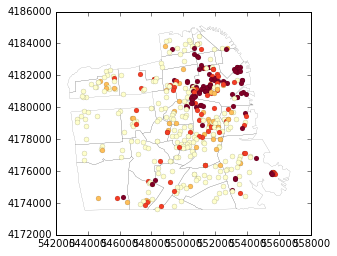

In [17]:
base = boundaries_proj.plot(color='white', linewidth=.1)
construction_proj.plot(ax=base, column='net_units', cmap='YlOrRd', scheme = 'quantiles', fillstyle='full', markeredgewidth=0.1, markersize=5)

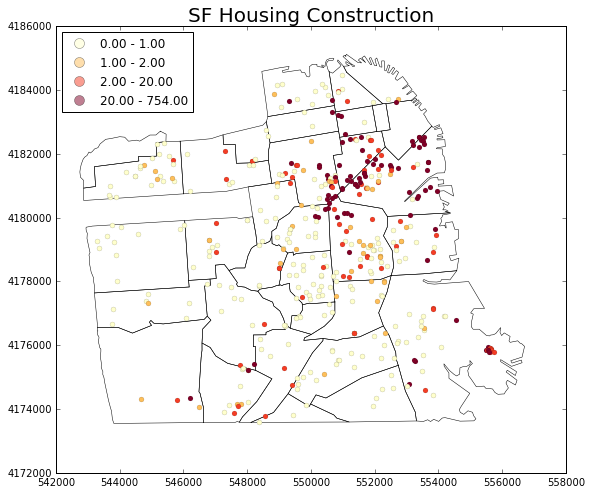

In [18]:
#Example with matplotlib structure broken out
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_title('SF Housing Construction').set_fontsize(20)
boundaries_proj.plot(ax=ax, color='white', linewidth=.5)
construction_proj.plot(ax=ax, column='net_units', cmap='YlOrRd', scheme = 'quantiles', fillstyle='full', markeredgewidth=0.1, markersize=5, legend = True)


In [19]:
construction_proj[construction_proj['net_units']<0]


,address,affordable_units,lat_lon,latest_date,lot_number,net_affordable_units,net_units,status,units,zone,quarter,lon,lat,quarter_order,consdate,geometry
10179,1636 ARMSTRONG AV,0.0,"[-122.392883, 37.726894]",2010-04-08T00:00:00.000,5419005,0.0,-1.0,CONSTRUCTION,0.0,M-1,Q42015,-122.392883,37.726894,14,14.0,POINT (553500.5741929504 4175687.493430352)


In [20]:
fig.savefig("myplot.png", dpi = 400) #test saving image through code

# Map 1

In [118]:
#First, spatial join between points and neighborhood boundaries. Set 'how' to 'right' to preserve polygon geometries.
nbcum = gpd.sjoin(construction_proj, boundaries_proj, how = 'right', op='within')

In [119]:
#Next, dissolve by neighborhoods to get sum of units
nbcum = nbcum[['NAME', 'geometry', 'net_units', 'net_affordable_units']]
nb_map = nbcum.dissolve(by='NAME', aggfunc='sum')

nb_map['net_units'].fillna(0, inplace = True)
nb_map['net_affordable_units'].fillna(0, inplace = True)

nb_map['net_units'] = nb_map['net_units'].astype(int)
nb_map['net_affordable_units'] = nb_map['net_affordable_units'].astype(int)
#nb_map.head(20)

In [102]:

#nb_map

,geometry,net_units,net_affordable_units
NAME,,,
Bayview,"POLYGON ((554574.6106205424 4178337.626031509,...",624,624
Bernal Heights,"POLYGON ((552517.0661455577 4178186.826860333,...",31,31
Castro-Upper Market,"POLYGON ((550550.4056691342 4180426.979706116,...",312,312
Chinatown,"POLYGON ((551924.9805236384 4183510.040792348,...",0,0
Crocker Amazon,"POLYGON ((548119.3345987017 4173580.950723149,...",23,23
Diamond Heights,"POLYGON ((548335.436621333 4177695.536434151, ...",1,1
Downtown,"POLYGON ((552329.8439027811 4182220.744833167,...",1845,1845
Excelsior,"POLYGON ((552739.6108341006 4175370.285793872,...",20,20
Financial District,"POLYGON ((553314.5264327468 4183712.224809667,...",1017,1017


In [120]:
nb_map['coords'] = nb_map['geometry'].apply(lambda x: x.representative_point().coords[:])
nb_map['coords'] = [coords[0] for coords in nb_map['coords']]

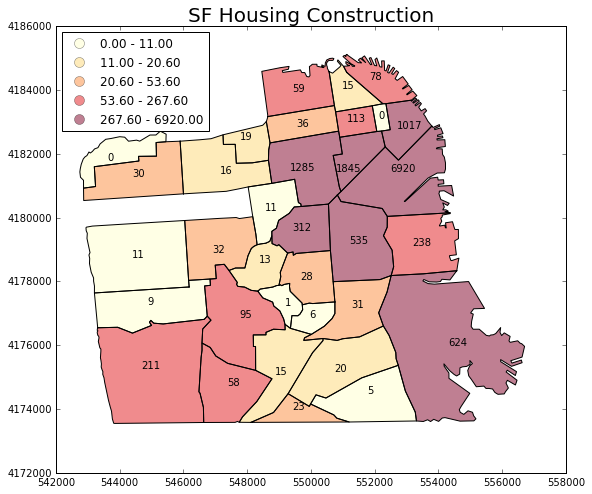

In [121]:
#Graph Total Housing Produced
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_title('SF Housing Construction').set_fontsize(20)
nb_map.plot(ax=ax, column='net_units', cmap='YlOrRd', scheme = 'quantiles', fillstyle='full', markeredgewidth=0.1, markersize=5, legend = True)
for idx, row in nb_map.iterrows():
    plt.annotate(s=row['net_units'], xy=row['coords'],
                 horizontalalignment='center')

In [96]:
nb_map

,geometry,net_units,net_affordable_units
NAME,,,
Bayview,"POLYGON ((554574.6106205424 4178337.626031509,...",624.0,165.0
Bernal Heights,"POLYGON ((552517.0661455577 4178186.826860333,...",31.0,0.0
Castro-Upper Market,"POLYGON ((550550.4056691342 4180426.979706116,...",312.0,10.0
Chinatown,"POLYGON ((551924.9805236384 4183510.040792348,...",0.0,0.0
Crocker Amazon,"POLYGON ((548119.3345987017 4173580.950723149,...",23.0,0.0
Diamond Heights,"POLYGON ((548335.436621333 4177695.536434151, ...",1.0,0.0
Downtown,"POLYGON ((552329.8439027811 4182220.744833167,...",1845.0,103.0
Excelsior,"POLYGON ((552739.6108341006 4175370.285793872,...",20.0,0.0
Financial District,"POLYGON ((553314.5264327468 4183712.224809667,...",1017.0,85.0


IndexError: too many indices for array

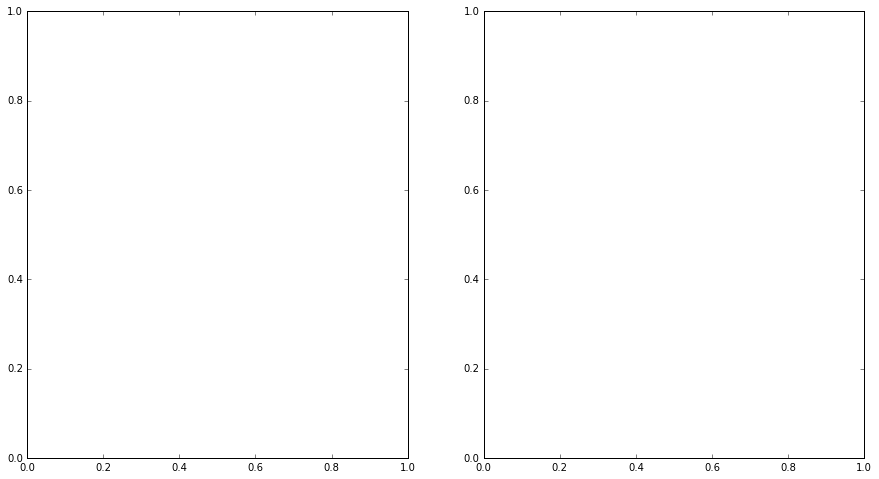

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[1, 1].set_aspect('equal')
axes[1, 2].set_aspect('equal')


axes[1, 1].set_title('SF Housing Construction').set_fontsize(20)
axes[1, 2].set_title('SF Affordable Housing Construction').set_fontsize(20)

#nb_map.plot(column = 'net_units', scheme='quantiles', cmap='YlOrRd');

In [21]:
construction_proj2 = construction_proj[construction_proj['net_units']< 0]

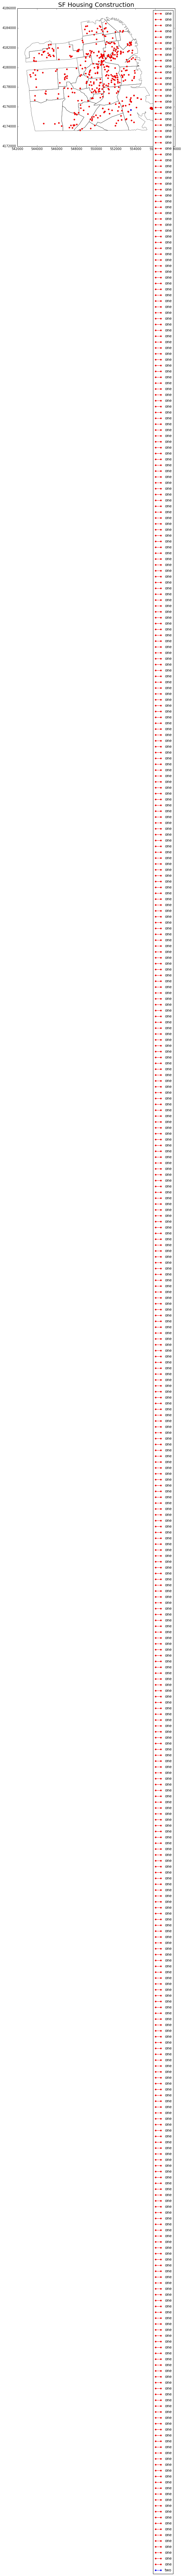

In [23]:
#nc = ['red' if n<0 else 'green' for n in construction_proj['net_units']]
#Experimental Area
#Example with matplotlib structure broken out
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_title('SF Housing Construction').set_fontsize(20)
boundaries_proj.plot(ax=ax, color='white', linewidth=.5)
construction_proj.plot(ax=ax, column='net_units', c = 'red',  fillstyle='full', markeredgewidth=0.1, markersize=5, label='one')
construction_proj2.plot(ax=ax, column='net_units', c = 'blue',  fillstyle='full', markeredgewidth=0.1, markersize=5, label='two')
ax.legend(loc='best')

NotImplementedError: 

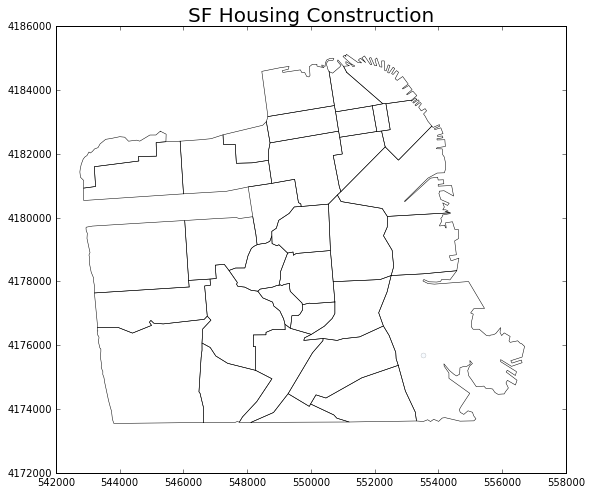

In [48]:
#Example with matplotlib structure broken out
ec = ['orange' if key == 0 else 'purple' for u, v, key in G.edges(keys=True)]

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_title('SF Housing Construction').set_fontsize(20)
boundaries_proj.plot(ax=ax, color='white', linewidth=.5)
construction_proj.plot(ax=ax, column='net_units', cmap = 'YlOrRd', scheme = 'quantiles', fillstyle='full', markeredgewidth=0.1, markersize=5, legend = True)

TypeError: list indices must be integers or slices, not str

# Extra Code from Before

In [ ]:

#Finally, create a quarter variable that is more readable for the x-axis. 
quarter_dict = {'Q22016': '2016-Q2', 'Q12016': '2016-Q1', 'Q42015': '2015-Q4', 'Q32015': '2015-Q3', 'Q22015': '2015-Q2', 
                'Q12015': '2015-Q1', 'Q42014': '2014-Q4', 'Q32014': '2014-Q3', 'Q22014': '2014-Q2', 'Q12014': '2014-Q1', 
                'Q42013': '2013-Q4', 'Q32013': '2013-Q3', 'Q22013': '2013-Q2', 
                'Q12013': '2013-Q1', 'Q42012': '2012-Q4'}

full_df2['quarter2'] = full_df2['quarter'].map(quarter_dict)

In [ ]:
Chart(full_df2).mark_area().encode(
    x=X('quarter2', axis = Axis(title = 'Quarter')),
    y=Y('sum(net_units):Q', axis = Axis(title = 'Total Net Units Built')),
).configure_cell(
    height=300.0,
    width=1000.0,
)

Finally, I chart total net units built over time where the x-axis is the quarter of the year (e.g. Q1 is January 1 - March 31). The time period spans from the fourth quarter of 2012 to the first quarter of 2016. The chart shows that units built vary a lot over time and there does not appear to be a clear trend towards more or less construction. If anything, there has been more units completed in recent quarters than in the beginning of the time period. 